

## Universidad Santo Tomas

### Camilo Andres Rey Guanumen

### Metodos de minerias de datos en Python

### Proyecto

#### Introducción

Para el desarrollo del proyecto se implementó un dataset de un banco portugués, que implemento marketing  directo mediante  llamadas telefónicas, con el objetivo de predecir si  los clientes se suscribirían a uno de sus productos, en este caso depósito a plazo bancario.


<li>Numero de atributos: 17</li>

<li>Numero de variables: 1 (depósito a plazo)</li>

<li>Area de estudio: Empresa financiera</li>




#### Cargamos el dataset "Bank"

In [1]:
import pandas as pd
bank = pd.read_csv('/Users/camilorey/Downloads/bank/bank-full.csv', delimiter = ';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Sobre el dataset se puede decir que es un aprendizaje supervisado, ya que el motivo del estudio es poder predecir si un cliente se suscribirá al depósito a plazo de la entidad bancaria, para ello podemos implementar un modelo que relacione los atributos que permitan aproximar la medición futura de los datos, en este caso bajo el estudio y la información recolectada, poder implementar un modelo que permita predecir si un cliente se suscribirá al instrumento financiero del banco y qué factores son relevantes para poder identificar estos potenciales individuos. 

Por otro lado, sería un problema de clasificación teniendo en cuenta que sus etiquetas son discretas, ¿Se suscribirá un cliente a un depósito a plazo?, SI o NO.


En este caso sería óptimo implementar clustering, dado que por medio de este podríamos formar grupos homogéneos de clientes potenciales, los cuales compartirían características similares que permitirán identificar un segmento objetivo para el ofrecimiento de su instrumento financiero y de esta manera tener una repuesta positiva en su mayor parte sobre la suscripción al depósito a plazo.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

dummies=pd.get_dummies(bank['y'], drop_first = True)
bank = pd.concat([bank, dummies], axis = 1)

# Eliminamos la vairable original y
bank = bank.drop(columns=['y'])

bank.head

<bound method NDFrame.head of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day

In [4]:
bank.info();bank.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  yes        45211 non-null  uint8 
dtypes: int64(7), object(9), uint8(1)
memory usage: 5.6+ MB


,age,balance,day,duration,campaign,pdays,previous,yes
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000



 Mediante el commando "Info" podemos observar a grandes rasgos la infromacion que contine nuestro dataset, infromacion como, cnatidad de columnas, en este caso represetnta la catidad de atributos, tipo de datos que contine cada columna y el total de regristros.
 
 Por otro lado el comando "Describe" nos  calcula datos estadísticos que pueden ser útiles: cantidad, media, desvío estándar, valores máximo y mínimo.
 


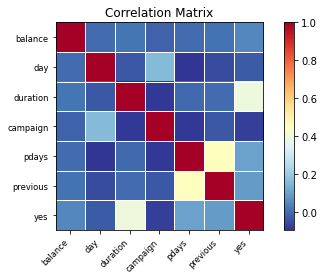

In [5]:
corr = bank.set_index('age').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

 A continuacion relizamos un grafico de la matriz de correlacion. En este caso vemos baja correlación entre los atributos.
 
 Sin embargo vemos que hay una mediana correlacion entre la duracion de la llamada y la respuesta a la suscripcion.
 

/Users/camilorey/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


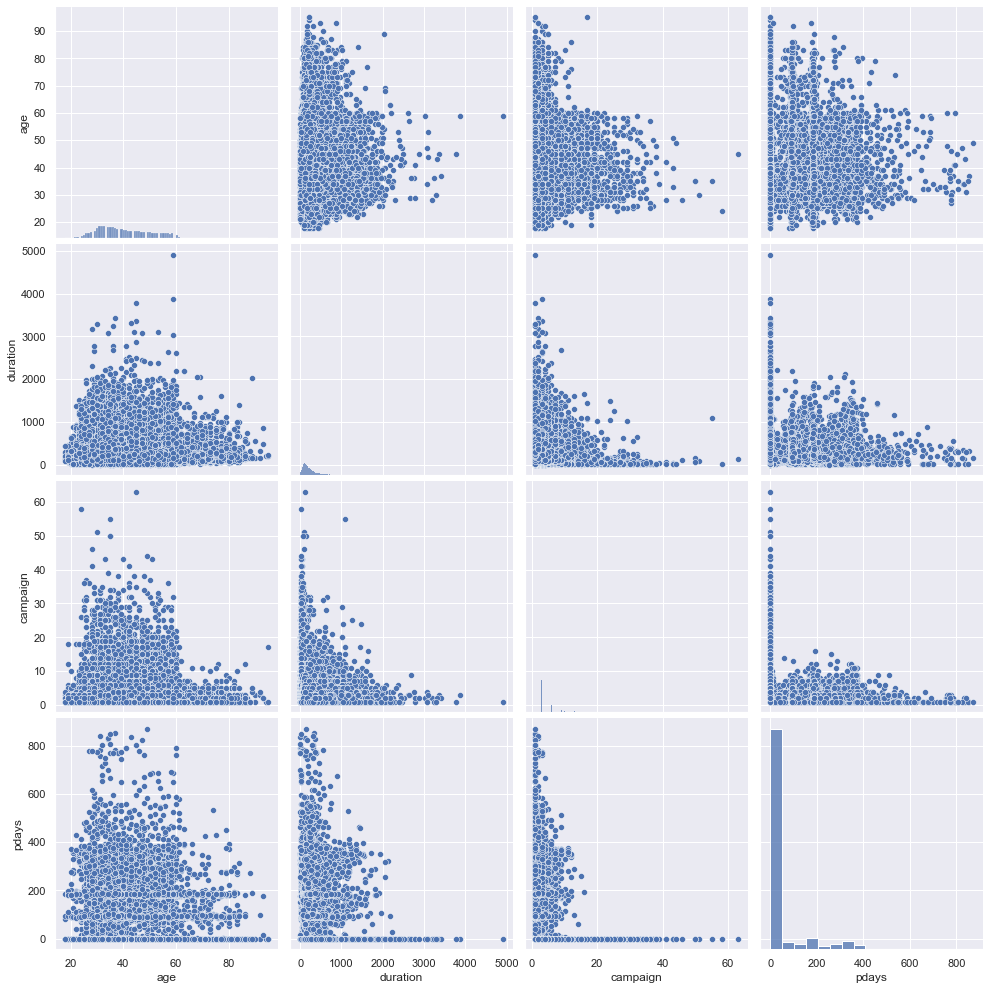

In [7]:
import seaborn as sns

sns.set()
cols = ['age', 'duration','campaign', 'pdays']
sns.pairplot(bank[cols], size = 3.5)
plt.show();


Se realiza una preselección de variables en donde tomamos las siguientes:

#### 1. age: 
Edad de la persona que fue contactada telefonicamente.
#### 2.  campaign: 
Número de contactos realizados durante esta campaña y para este cliente.
#### 3.  pdays: 
Número de días que pasaron después de que el cliente fuera contactado por última vez desde una campaña anterior.
#### 4.  duration: 
Duración del último contacto, en segundos (numérico). Nota importante: este atributo afecta en gran medida al destino de salida (por ejemplo, si duration=0, entonces y='no'). Sin embargo, no se conoce la duración antes de realizar la llamada.

### Analisis:

Se toman estos atributos, ya que se consideran relevantes e influyentes para la creación de un modelo de predicción, dado que la edad influye mucho en la posibilidad de suscribirse a un depósito a plazo, esto desde el punto financiero, no es tan factible para una persona que apenas cumple su mayoría de edad y comienza su vida financiera, en comparación con una persona de más edad que lleva tiempo allí, por otro lado se mide la duración de las llamadas, donde podemos observar que en promedio tiene una duración similar entre todos los rangos de edades, pero así mismo presenta datos atípicos a partir de los 20 años hasta los 40 años.

Por otro lado, están los re contactos en intervalos de tiempo entre contactos por la campaña, es relevante, ya que de allí se podría optimizar los costos de las llamadas, ejemplo, observar donde hubo menos contactos y la respuesta de suscripción fue "Si".


Para concluir se propone un analisis de correspondecias, con el fin de indetificar los relacion entre variables y poder desarrollar un modelo optimo para el relizar el marketing de la manera mas optima posible. 

#### Bibliografia:
1. https://elmundodelosdatos.com/tecnicas-para-codificar-variables-categoricas-ordinal-one-hot/
2. https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
3. https://www.kaggle.com/code/abonaplata/analisis-exploratorio-de-datos-con-python
    